# Enhancing Product Discovery in Exhibition 📈

<!-- <font size=+3><center><b>Telco Churn Prediction with ML Insights 📈</b></center></font> -->
<img src=".\rec.png" style="float: center;" width="360" height="360" />
<span style="font-size: 12px;"><center><em>Photo by NVIDIA</em></center></span>
<span style="font-size: 20px;"><left><b>Table of Contents</b></left></span>

- [Introduction](#Introduction)
- [Objective](#Objective)
- [Libraries](#Libraries)
- [Default Setting](#Default-Setting)
- [Functions](#Functions)
- [A Quick Look at our Data](#A-Quick-Look-at-our-Data)
    - [Data Attributes](#Dataset-Attributes)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Continuous Variables](#Continuous-Variables)
    - [Categorical Variables](#Categorical-Variables)
- [Data Preprocessing](#Data-Preprocessing)
    - [Feature Selection](#Feature-Selection)
    - [Encoding Categorical Features](#Encoding-Categorical-Features)
    - [Scaling](#Scaling)
    - [Addressing Class Imbalance](#Addressing-Class-Imbalance)
- [Building Machine Learning Models](#Building-Machine-Learning-Models)
    - [Baseline Models](#Baseline-Models)
    - [Model Tuning](#Model-Tuning)
- [Results](#Results)
    - [Learning Curves](#Learning-Curves)
    - [Feature Importance](#Feature-Importance)
    - [Performance Comparison](#Performance-Comparison)
- [Evaluating the Test Set](#Evaluating-the-Test-Set)
- [Bibliography](#Bibliography)
- [Future Development](#Future-Development)
- [Conclusions](#Conclusions)

# Introduciton

In the dynamic exhibition industry, attendees often face the challenge of efficiently discovering relevant products amidst a vast array of offerings. To address this issue, recommendation systems have gained significant attention for their ability to provide personalized suggestions based on user preferences. In this research, we aim to develop an item-based recommendation model tailored to the exhibition industry, leveraging the rich product features available. By analyzing these features, our model will enable attendees to find products that closely align with their interests and recommend similar items, thereby enhancing the overall exhibition experience.

# Objective

In this case, the absence of explicit labels and user information poses a challenge for building effective recommendation models. This research aims to develop an item-based recommendation model using product features, leveraging unsupervised learning techniques to overcome the absence of labels and limited user information. By addressing this problem, the study aims to enhance product discovery and facilitate meaningful connections between attendees and exhibitors in the exhibition industry.

In this project, I would like to answer intriguing questions that I have discovered:

* What are the key product features that significantly influence the relevance and similarity of items within the exhibition industry? How can the item-based recommendation model effectively utilize these product features?
* What are the suitable similarity analysis techniques and algorithms that can measure item similarity based on the available product features?
* How can machine learning techniques be employed to train the item-based recommendation model using the exhibition industry's product feature dataset?
* How can the performance and accuracy of the recommendation model be evaluated and measured in the context of the exhibition industry, considering the absence of explicit labels?
* What are the challenges and techniques involved in extracting relevant information from the text descriptions of products to enhance the recommendation model?

# Library

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
pd.set_option('precision', 3)

# Data Visualisation Libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!pip install seaborn --upgrade
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

# Sentence BERT
from sentence_transformers import SentenceTransformer, util
print('✔️ Libraries Imported!')

✔️ Libraries Imported!


# Default Setting

In [2]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

font_size = 18
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size + 2
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2
plt.rcParams['legend.fontsize'] = font_size - 2

# colors = ['#00A5E0', '#DD403A']
colors_cat = ['#E8907E', '#D5CABD', '#7A6F86', '#C34A36', '#B0A8B9', '#845EC2', '#8f9aaa', '#FFB86F', '#63BAAA', '#9D88B3', '#38c4e3']
# colors_comp = ['steelblue', 'seagreen', 'black', 'darkorange', 'purple', 'firebrick', 'slategrey']

random_state = 42
# scoring_metric = 'recall'
# comparison_dict, comparison_test_dict = {}, {}

print('✔️ Default Setting Done!')

✔️ Default Setting Done!


# Function

# A Quick Look at our Data

## Dataset Attributes
    
- **Language**: The language of the product description
- **Product_id**: The unique ID of the product
- **Vendor_id**: The unique ID of the vendor
- **Country**: The country associated with the product
- **Main_Category**: The main category or exhibition type of the product
- **Sub_Category**: The sub-category or specific category of the product
- **Description**: The text description of the product

In [150]:
df = pd.read_excel('../Data/Product_20230702.xlsx', header=0, skiprows=[0,2,3,4])

print('✔️ Dataset Imported Successfully!\n')
print('It contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

✔️ Dataset Imported Successfully!

It contains 977 rows and 28 columns.


In [151]:
df.head()

,語系*,產品ID*,產品名稱*,自定關鍵字(逗點隔開),是否要貼標,庫存狀況,定價,售價,產品網址*,廠商ID*,廠商攤位號碼,廠商名稱*,國家簡寫*,原廠名稱,產品主類別*(展別),產品次類別*(類別),簡述 (展品特色),規格,SEO Title,SEO DES,影片連結,認證,是否開啟*,列表圖,內頁圖片1,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,tw,CU0004601801,PE 修補膠帶,NaN,1.0,in_stock,99.0,99.0,CU0004601801,CU00046018,NaN,萬洲化學股份有限公司,TW,萬洲化學股份有限公司,agritech,Garden-Materials,●全天候環保聚乙烯膠帶\n \n ●高粘合溶劑型丙烯酸粘合劑 \n \n ●適用於大範圍的戶...,NaN,NaN,NaN,NaN,NaN,1.0,CU0004601801.jpg,CU0004601801.jpg,NaN,NaN,NaN
1,tw,CU0004601802,C+ 生物可分解膠帶,NaN,1.0,in_stock,99.0,99.0,CU0004601802,CU00046018,NaN,萬洲化學股份有限公司,TW,萬洲化學股份有限公司,agritech,Garden-Materials,● C+通用型包裝膠帶\n \n ●全世界第一個生物可分解OPP 包裝解決方案，可與一般PP...,NaN,NaN,NaN,NaN,NaN,1.0,CU0004601802.jpg,CU0004601802.jpg,NaN,NaN,NaN
2,tw,CU0004601803,PVC 接梨膠帶,NaN,1.0,in_stock,99.0,99.0,CU0004601803,CU00046018,NaN,萬洲化學股份有限公司,TW,萬洲化學股份有限公司,agritech,Garden-Materials,●軟質亮面PVC 膠帶\n \n ●高剝離力\n \n ●適合用於梨子接枝 \n \n ●環...,NaN,NaN,NaN,NaN,NaN,1.0,CU0004601803.jpg,CU0004601803.jpg,NaN,NaN,NaN
3,tw,CU0004601804,PVC 接梨膠帶,NaN,1.0,in_stock,99.0,99.0,CU0004601804,CU00046018,NaN,萬洲化學股份有限公司,TW,萬洲化學股份有限公司,agritech,Garden-Materials,軟質亮面PVC 膠帶、高剝離力、適合用於梨子接枝,NaN,NaN,NaN,NaN,NaN,1.0,CU0004601804.jpg,CU0004601804.jpg,NaN,NaN,NaN
4,tw,CU0004601805,回收PET膠帶,NaN,1.0,in_stock,99.0,99.0,CU0004601805,CU00046018,NaN,萬洲化學股份有限公司,TW,萬洲化學股份有限公司,agritech,Garden-Materials,高黏著力、無溶劑、環境友善、高保持力、高機械強度,NaN,NaN,NaN,NaN,NaN,1.0,CU0004601805.jpg,CU0004601805.jpg,NaN,NaN,NaN


Remove redundant variables

In [152]:
df = df[['語系*', '產品ID*', '產品名稱*', '廠商ID*', '國家簡寫*', '產品主類別*(展別) ', '產品次類別*(類別)', '簡述 (展品特色)']]

In [153]:
translation_dict = {
    '語系*': 'Language',
    '產品ID*': 'Product_id',
    '產品名稱*':'Product_Name',
    '廠商ID*': 'Vendor_id',
    '國家簡寫*': 'Country',
    '產品主類別*(展別) ': 'Main_Category',
    '產品次類別*(類別)': 'Sub_Category',
    '簡述 (展品特色)': 'Description'
}
df = df.rename(columns=translation_dict)

In [154]:
translation_dict.values()

dict_values(['Language', 'Product_id', 'Product_Name', 'Vendor_id', 'Country', 'Main_Category', 'Sub_Category', 'Description'])

In [155]:
df_tw = df[df['Language']=='tw'].reset_index(drop = True, inplace = False)
df_en = df[df['Language']=='en'].reset_index(drop = True, inplace = False)

In [156]:
df = pd.merge(df_tw, df_en, on='Product_id', how='outer')

In [157]:
col_idx = np.concatenate((np.arange(1,8,1) , [df.columns.get_loc('Product_Name_y'),-1]))
df = df.iloc[:,col_idx]

In [158]:
df.columns

Index(['Product_id', 'Product_Name_x', 'Vendor_id_x', 'Country_x',
       'Main_Category_x', 'Sub_Category_x', 'Description_x', 'Product_Name_y',
       'Description_y'],
      dtype='object')

In [162]:
col_name = ['Product_id', 'Product_Name', 'Vendor_id', 'Country', 'Main_Category',
            'Sub_Category', 'Description','Product_Name_en', 'Description_en']
df.columns = col_name

The `info()` method can give us valuable information such as the number of non-null values and the type of each feature:

In [163]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product_id       488 non-null    object
 1   Product_Name     488 non-null    object
 2   Vendor_id        488 non-null    object
 3   Country          488 non-null    object
 4   Main_Category    488 non-null    object
 5   Sub_Category     488 non-null    object
 6   Description      487 non-null    object
 7   Product_Name_en  488 non-null    object
 8   Description_en   487 non-null    object
dtypes: object(9)
memory usage: 54.3+ KB


,Product_id,Product_Name,Vendor_id,Country,Main_Category,Sub_Category,Description,Product_Name_en,Description_en
0,CU0004601801,PE 修補膠帶,CU00046018,TW,agritech,Garden-Materials,●全天候環保聚乙烯膠帶\n \n ●高粘合溶劑型丙烯酸粘合劑 \n \n ●適用於大範圍的戶...,PE repair tape,●All-weather environmentally friendly polyethy...
1,CU0004601802,C+ 生物可分解膠帶,CU00046018,TW,agritech,Garden-Materials,● C+通用型包裝膠帶\n \n ●全世界第一個生物可分解OPP 包裝解決方案，可與一般PP...,C biodegradable tape,● C+ general purpose packing tape\n \n ●The wo...
2,CU0004601803,PVC 接梨膠帶,CU00046018,TW,agritech,Garden-Materials,●軟質亮面PVC 膠帶\n \n ●高剝離力\n \n ●適合用於梨子接枝 \n \n ●環...,PVC pear tape,●Soft and glossy finished PVC tape\n \n ●High ...
3,CU0004601804,PVC 接梨膠帶,CU00046018,TW,agritech,Garden-Materials,軟質亮面PVC 膠帶、高剝離力、適合用於梨子接枝,PVC pear tape,Soft and glossy finished PVC tape、High unwindi...
4,CU0004601805,回收PET膠帶,CU00046018,TW,agritech,Garden-Materials,高黏著力、無溶劑、環境友善、高保持力、高機械強度,Recycled PET Tape,Strong Adhesion、Solvent-Free、ECO-Friendly、Heav...


Modify the data type of category variables

In [164]:
categorical = ['Country', 'Main_Category', 'Sub_Category']
df[categorical] = df[categorical].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Product_id       488 non-null    object  
 1   Product_Name     488 non-null    object  
 2   Vendor_id        488 non-null    object  
 3   Country          488 non-null    category
 4   Main_Category    488 non-null    category
 5   Sub_Category     488 non-null    category
 6   Description      487 non-null    object  
 7   Product_Name_en  488 non-null    object  
 8   Description_en   487 non-null    object  
dtypes: category(3), object(6)
memory usage: 45.9+ KB


In [165]:
df['Main_Category'] = df['Main_Category'].replace({0:'N/A'})
df['Sub_Category'] = df['Sub_Category'].replace({0:'N/A'})

# Exploratory Data Analysis

Text(0, 0.5, 'Counts')

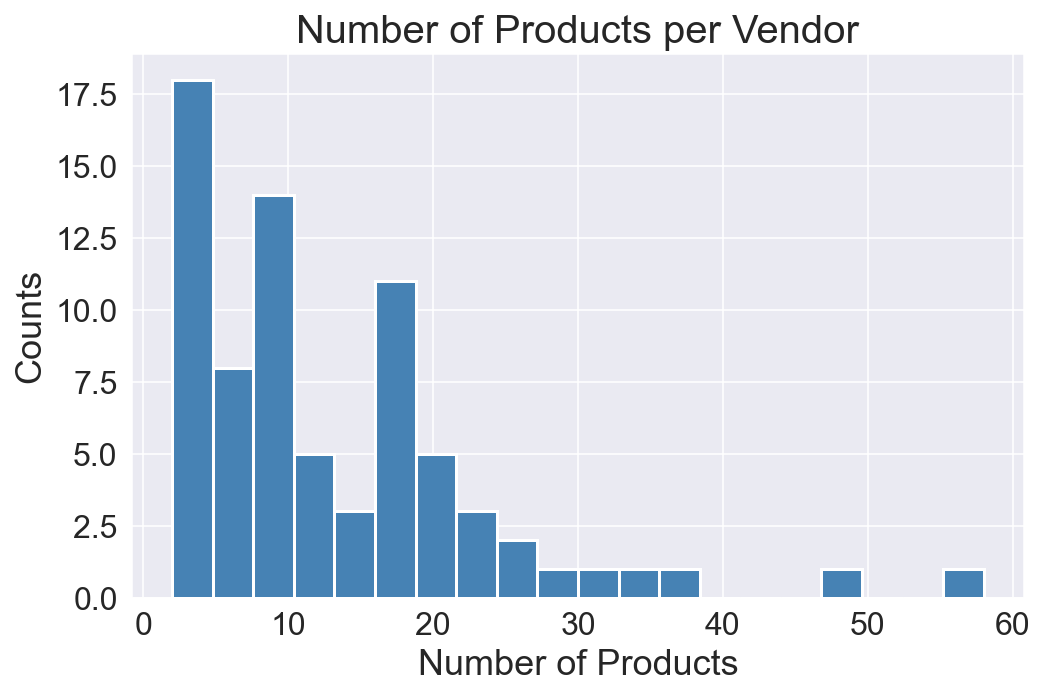

In [10]:
df['Vendor_id'].value_counts().hist(figsize=(8, 5),
                          bins=20,
                          color='steelblue',
                          linewidth=1.5);
plt.title('Number of Products per Vendor')
plt.xlabel('Number of Products')
plt.ylabel('Counts')

In [11]:
df['Country'].value_counts()

TW    974
IT      2
Name: Country, dtype: int64

In [107]:
df['Language'].value_counts()

en    488
tw    488
Name: Language, dtype: int64

## Categorical variable

In [12]:
df['Main_Category'].value_counts()

agritech                        560
agrilivestock                   231
agrifresh                       106
sustainable-aquatic-products     50
fish-farming                     28
N/A                               1
Name: Main_Category, dtype: int64

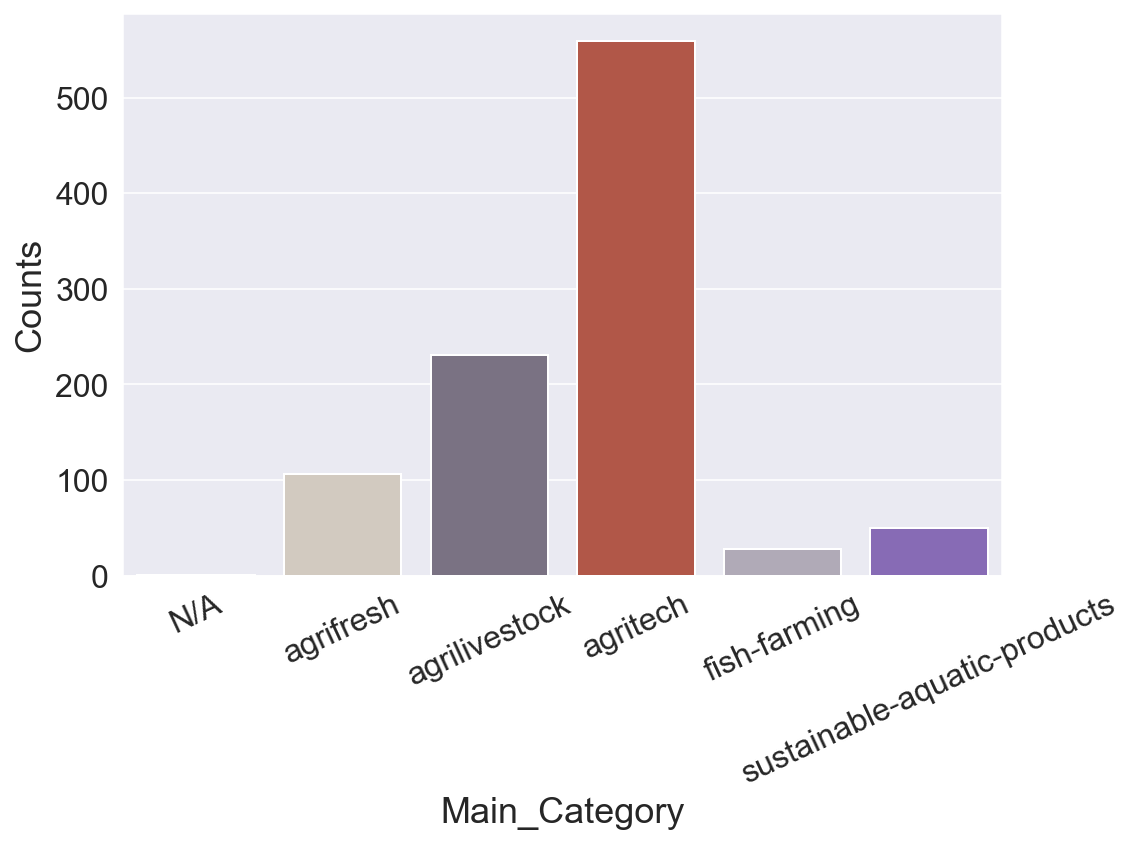

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Main_Category', data=df, palette=colors_cat, width=0.8)
plt.ylabel('Counts')
plt.xticks(rotation=25)
plt.tight_layout();

In [14]:
df['Sub_Category'].value_counts().sort_index()

N/A                                                        1
AIoT-Equipment-and-System                                 16
AIoT-Intelligent-Cold-Chain-Logistic-Solution             20
Agricultural-Automation-Equipment                          8
Agricultural-Processing-Machinery                         24
Agrifresh-Other                                           26
Agrilivestock-Other                                       99
Agritech-Other                                           258
Aquaculture-Technology-and-Management                      2
Artificial-Fog-Equipment                                   2
Biotechnology-Applications                                 4
Dehydrated-and-Pickled-Aquatic-Products                    2
Feed-Processing-Equipment-and-Testing-Equipment            2
Feed-and-Feed-Additive                                     2
Fish-Farming-Other                                        18
Garden-Materials                                          58
Grow-Light              

## Text Description

In [15]:
df['Description']

0      ●全天候環保聚乙烯膠帶\n \n ●高粘合溶劑型丙烯酸粘合劑 \n \n ●適用於大範圍的戶...
1      ● C+通用型包裝膠帶\n \n ●全世界第一個生物可分解OPP 包裝解決方案，可與一般PP...
2      ●軟質亮面PVC 膠帶\n \n ●高剝離力\n \n ●適合用於梨子接枝 \n \n ●環...
3                               軟質亮面PVC 膠帶、高剝離力、適合用於梨子接枝
4                               高黏著力、無溶劑、環境友善、高保持力、高機械強度
5                            可書寫、無溶劑、高機械強度、可回收、高生質含量、可手撕
6      ●對於紙纖維有良好的附著力。\n \n ●應用溫度: 0° C~ 50° C (32° F~...
7                               在畜業可以使環境溫度降溫，讓動物們可以比較舒服。
8      紙護角是一種用於保護貨物或貨盤邊緣的產品，通常由紙質材料製成。其主要用途是保護貨物或貨盤邊緣...
9      水簾片在蘭花栽培中的特色是能夠提供穩定的濕度和溫度環境，有利於蘭花的生長和發展。由於蘭花生長...
10     水簾片，是一種常用於畜牧業、蘭花和溫室主要的降溫產品，主要特點包括：\n \n \n \n ...
11                                       運送過程可以保護外箱防撞保護。
12     奈米氣泡是水中或液體中直徑小於100奈米的氣泡，氣泡尺寸若在100奈米以上，1000奈米以下...
13     翼詠科技的物聯網智慧環控方案，使用物聯網「多功能智慧控制器」取代傳統定時器與邏輯控制器 (P...
14     翼詠科技提供運用光積值達成精準澆灌的解決方案，以全新「多功能智慧控制器」搭配美國知名 Apo...
15     台灣唯一通過「美國環境保護局 WaterSense 省水標章」認證的自動澆灌與智慧節水系統，...
16     興藝峰生技農業和霹靂布袋戲，在地深耕，放眼世界，均為台灣原創精神代表！ 跨界聯名推出【霹靂穠...
17                             

# Data Preprocessing

In [16]:
# df = df[df['Main_Category']=='agritech'][0:100]
# df.reset_index(drop=True, inplace =True)

In [90]:
arr = [1,2,4,3]
alpha = arr/np.sum(arr)

## Categorical Features Encoding

Utilize one-hot encoding to encode the `Main_Category` and `Sub_Category` variables, enabling us to analyze the similarity between vectors later

In [82]:
main_encode = pd.get_dummies(df['Main_Category'], drop_first=False)*alpha[0]
sub_encode = pd.get_dummies(df['Sub_Category'], drop_first=False)*alpha[1]
category_encode = np.concatenate((main_encode, sub_encode), axis=1)
category_encode.shape

(977, 39)

## Text Encoding

Utilize Sentence-BERT, which is based on Siamese BERT-Networks, to generate embeddings for both `Product_Name` and `Description`, as described in the paper ["Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks"](https://arxiv.org/pdf/1908.10084.pdf) (Reimers & Gurevych, 2019).

In [91]:
# model = SentenceTransformer('paraphrase-distilroberta-base-v1')
# product_em = model.encode(df['Product_Name'])
# des_em = model.encode(df['Description'])
# text_em = np.concatenate((product_em, des_em), axis=1)

In [92]:
product_em = product_em * alpha[2]
des_em = des_em * alpha[3]
text_em = np.concatenate((product_em, des_em), axis=1)

Combine category embedding and text embedding

In [93]:
embedding = np.concatenate((category_encode, product_em), axis=1)
embedding.shape

(977, 807)

In [97]:
df.head(5)

,Language,Product_id,Product_Name,Vendor_id,Country,Main_Category,Sub_Category,Description
0,tw,CU0004601801,PE 修補膠帶,CU00046018,TW,agritech,Garden-Materials,●全天候環保聚乙烯膠帶\n \n ●高粘合溶劑型丙烯酸粘合劑 \n \n ●適用於大範圍的戶...
1,tw,CU0004601802,C+ 生物可分解膠帶,CU00046018,TW,agritech,Garden-Materials,● C+通用型包裝膠帶\n \n ●全世界第一個生物可分解OPP 包裝解決方案，可與一般PP...
2,tw,CU0004601803,PVC 接梨膠帶,CU00046018,TW,agritech,Garden-Materials,●軟質亮面PVC 膠帶\n \n ●高剝離力\n \n ●適合用於梨子接枝 \n \n ●環...
3,tw,CU0004601804,PVC 接梨膠帶,CU00046018,TW,agritech,Garden-Materials,軟質亮面PVC 膠帶、高剝離力、適合用於梨子接枝
4,tw,CU0004601805,回收PET膠帶,CU00046018,TW,agritech,Garden-Materials,高黏著力、無溶劑、環境友善、高保持力、高機械強度


In [ ]:
def recommend_top_k(product_id, k):
    df['Product_id'] == product_id
    rec_k_dic = util.semantic_search(embedding[177], embedding , top_k=10)[0]
    product_id = []
    row_idx = []
    for item in rec_k_dic:
        row_idx.append(item['corpus_id'])
    
    return 

In [106]:
df[df['Product_id'] == product_id]

,Language,Product_id,Product_Name,Vendor_id,Country,Main_Category,Sub_Category,Description
2,tw,CU0004601803,PVC 接梨膠帶,CU00046018,TW,agritech,Garden-Materials,●軟質亮面PVC 膠帶\n \n ●高剝離力\n \n ●適合用於梨子接枝 \n \n ●環...
491,en,CU0004601803,PVC pear tape,CU00046018,TW,agritech,Garden-Materials,●Soft and glossy finished PVC tape\n \n ●High ...


In [105]:
product_id = 'CU0004601803'

In [101]:
data.iloc[item_id]

NameError: name 'data' is not defined

In [98]:
rec_k_dic = util.semantic_search(embedding[177], embedding , top_k=10)[0]

In [99]:
item_id = []
for item in rec_k_dic:
    item_id.append(item['corpus_id'])
df.iloc[item_id]

,Language,Product_id,Product_Name,Vendor_id,Country,Main_Category,Sub_Category,Description
177,tw,CU0002402406,伸缩除草刀,CU00024024,TW,agritech,Garden-Materials,伸缩除草刀\n \n ---更多產品請看產品型錄---
173,tw,CU0002402402,除草刀,CU00024024,TW,agritech,Garden-Materials,KC-T68K56除草刀鉻鉬合金鋼的材質，使產品本身更加的堅固。搭配上開韌的兩側，即使乾燥的...
193,tw,CU0103217801,永磁直驅移動式風扇,CU01032178,TW,agrifresh,Refrigeration-and-Freezing-Equipment,1>永磁直驅馬達、超省電高效率。\n \n 2>本體結構精實、帶輪移動方便。\n \n 3>...
67,tw,CU0002082605,重量顯示檢測控制器,CU00020826,TW,agrilivestock,Agrilivestock-Other,(包裝機控制、工廠自動化配料)\n \n 型 號：BDI 9903 重量顯示檢測控制器\n ...
474,tw,CU0105968103,智慧秤重計,CU01059681,TW,agritech,Agritech-Other,智慧秤重計透過人工AI智慧與影像處理技術，準確計算家禽平均重量，過程無須花費人力，可搭配iC...
337,tw,CU0007812111,植栽用虹吸布,CU00078121,TW,agritech,Plant-Disease-and-Pest-Control,提高栽培管理優勢 \n \n ⚫ 避免高溫障礙，調節苗株栽培微氣候(可有效降溫)\n \n ...
68,tw,CU0002082606,重量顯示控制器,CU00020826,TW,agrilivestock,Agrilivestock-Other,(包裝機控制、工廠自動化配料)\n \n 型 號：BDI 2002 重量顯示控制器\n \n...
66,tw,CU0002082604,重量顯示控制器,CU00020826,TW,agrilivestock,Agrilivestock-Other,"型 號：BDI 2001B 重量顯示控制器\n \n ■ 1/30,000最高顯示解析度，A..."
69,tw,CU0002082607,重量顯示控制器,CU00020826,TW,agrilivestock,Agrilivestock-Other,(包裝機控制、工廠自動化配料)\n \n 型號：BDI 2006 重量顯示控制器 (7段LE...
64,tw,CU0002082602,重量顯示控制器,CU00020826,TW,agrilivestock,Agrilivestock-Other,型 號：BDI 9301B 重量顯示控制器\n \n ■ AC 110/220V 電源輸入\...


## Scale Continuos Features

In [24]:
df[continuous] = scale_continuous_variables(df[continuous], 'standard')

NameError: name 'scale_continuous_variables' is not defined

## Encode Categorical Features

We encode target variable as
- 0 for customers who have stopped subscribing to the service
- 1 for customers who continue their subscription

In [ ]:
map_dict = {'Retained': 0, 'Exited': 1}
df[target] = df[target].map(map_dict)
print(target, ' : ', [key for key in map_dict.keys()], '->', [value for value in map_dict.values()])

In [ ]:
df_onehot = df.copy()
df_label = df.copy()

In [ ]:
le = LabelEncoder()
for col_name in categorical :
    df_label[col_name] = le.fit_transform(df_label[col_name])
    print(col_name,' : ', le.inverse_transform(sorted(df_label[col_name].unique())),
          '->',sorted(df_label[col_name].unique()))
    
print('✔️ Features Encoded!')

In [ ]:
encoded_data = pd.get_dummies(df_onehot[categorical], drop_first=True)
df_onehot = pd.concat([df_onehot.drop(categorical, axis=1, inplace = False), encoded_data], axis=1)
np.shape(df_onehot)

In [ ]:
df_onehot

## Spilt the data into training set and testing set

In [ ]:
train_df_onehot, test_df_onehot = train_test_split(df_onehot, test_size=0.2, random_state=random_state)

train_df_onehot.reset_index(drop=True, inplace=True)
test_df_onehot.reset_index(drop=True, inplace=True)

print('Train set: {} rows, {} columns'.format(train_df_onehot.shape[0],
                                               train_df_onehot.shape[1]))
print(' Test set: {} rows, {} columns'.format(test_df_onehot.shape[0],
                                               test_df_onehot.shape[1]))

y_train_onehot = train_df_onehot[target]
X_train_onehot = train_df_onehot.drop(target, 1)

print('✔️ Sets Created!')

In [ ]:
train_df, test_df = train_test_split(df_label, test_size=0.2, random_state=random_state)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print('Train set: {} rows, {} columns'.format(train_df.shape[0],
                                               train_df.shape[1]))
print(' Test set: {} rows, {} columns'.format(test_df.shape[0],
                                               test_df.shape[1]))

y_train = train_df[target]
X_train = train_df.drop(target, 1)

print('✔️ Sets Created!')

In [ ]:
train_df, test_df = train_test_split(df_label, test_size=0.2, random_state=random_state)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print('Train set: {} rows, {} columns'.format(train_df.shape[0],
                                               train_df.shape[1]))
print(' Test set: {} rows, {} columns'.format(test_df.shape[0],
                                               test_df.shape[1]))

y_train = train_df[target]
X_train = train_df.drop(target, 1)

print('✔️ Sets Created!')

## Address Class Imbalanced Issue

Class imbalance is a common issue in real-world tasks where one class dominates the dataset. It can cause machine learning models to favor the majority class and perform poorly on the minority class. Standard metrics like accuracy can be misleading in imbalanced data scenarios. For example, a classifier that always predicts the majority class can have high accuracy even if it fails to detect the minority class.

To tackle this problem, we can use the SMOTE algorithm.

SMOTE (Synthetic Minority Over-sampling Technique) is considered a powerful method for addressing class imbalance because it effectively tackles the issue of insufficient data in the minority class. It identifies minority class instances and selects their nearest neighbors. It then creates synthetic samples by interpolating between these instances in the feature space. Here are a few reasons why SMOTE is considered powerful:

1. Generation of synthetic examples: SMOTE generates synthetic examples by creating new instances that are similar to existing minority class instances. It does this by interpolating between feature vectors of minority class samples. This process helps increase the representation of the minority class, providing more diverse examples for the model to learn from.
2. Preserving information: SMOTE's synthetic examples are generated by considering the feature space of the minority class. This means that SMOTE tries to maintain the underlying characteristics and patterns of the minority class when creating new instances. By doing so, it aims to prevent the loss of valuable information that may occur with other oversampling techniques.
3. Mitigating overfitting: SMOTE's synthetic examples help in reducing the risk of overfitting that can occur when using simple replication or duplication of minority class instances. By introducing new synthetic examples, SMOTE provides additional training data for the model, promoting better generalization and reducing the chances of the model memorizing the existing minority class instances.

In [ ]:
y_train.value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(x=target, data=train_df, palette=colors, ax=ax)

for index, value in enumerate(train_df[target].value_counts()):
    label = '{}%'.format(round((value / train_df[target].shape[0]) * 100, 2))
    ax.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='center',
                color=colors[index],
                fontweight='bold',
                size=font_size + 4)

ax.set_xticklabels(['Retained', 'Churned'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')
ax.set_ylim([0, 5000]);

In [ ]:
X_train_onehot

In [ ]:
over = SMOTE(sampling_strategy='auto', random_state=random_state)
X_train_onehot, y_train_onehot = over.fit_resample(X_train_onehot, y_train_onehot)

y_train_onehot.value_counts()

In [ ]:
over = SMOTE(sampling_strategy='auto', random_state=random_state)
X_train, y_train = over.fit_resample(X_train, y_train)

y_train.value_counts()

# Building Machine Learning Models

Now it's time to start building our machine learning models. We have selected six different classifiers to work with: 

1) [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) <br>
2) [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) <br>
3) [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) <br> 
4) [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) <br>
5) [Xtreme Gradient Boosting Classifier](https://xgboost.readthedocs.io/en/latest/) <br>
6) [Light Gradient Boosting Machine](https://lightgbm.readthedocs.io/en/latest/)

By default, these models may not be perfectly suited for our specific dataset. This is where hyperparameter tuning comes into play. Hyperparameters are settings that we can adjust to optimize the performance of our models. To find the best combination of hyperparameter values, we will use a technique called grid search. It systematically evaluates different combinations of hyperparameters and selects the one that gives the best results. In our case, we will be using the scoring metric of recall to assess the performance of our models.

To evaluate the models, we will utilize a confusion matrix, which provides insights into the true positives, true negatives, false positives, and false negatives. Additionally, we will generate learning curves for each classifier. Learning curves plot the performance of the model on both the training set and the validation set as we increase the size of the training data. These curves help us understand if the model is overfitting or underfitting the data and how the training size impacts the model's performance.

### Logistic regression

In [ ]:
lr = LogisticRegression(random_state=random_state)

param_grid = {
    'max_iter': [100],
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

lr_clf = GridSearchCV(estimator=lr,
                      param_grid=param_grid,
                      scoring=scoring_metric,
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

best_lr_clf = lr_clf.fit(X_train, y_train)
clf_performance(best_lr_clf, 'Logistic Regression', 'LR')

### Support Vector Classifier

In [ ]:
svc = SVC(probability=True, random_state=random_state)

param_grid = tuned_parameters = [{'kernel': ['rbf'],
                                  'gamma': ['scale', 'auto'],
                                  'C': [.1, 1, 2]},
                                 {'kernel': ['linear'],
                                  'C': [.1, 1, 10]}
                                ]

svc_clf = GridSearchCV(estimator=svc,
                       param_grid=param_grid,
                       scoring=scoring_metric,
                       cv=5,
                       verbose=False,
                       n_jobs=-1)

best_svc_clf = svc_clf.fit(X_train, y_train)
clf_performance(best_svc_clf, 'Support Vector Classifier', 'SVC')

### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=random_state)
param_grid = {
    'n_estimators': [100],
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': [6],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 3, 5],
    'min_samples_split': [2, 3, 5]
}

rf_clf = GridSearchCV(estimator=rf,
                      param_grid=param_grid,
                      scoring=scoring_metric,
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

best_rf_clf = rf_clf.fit(X_train, y_train)
clf_performance(best_rf_clf, 'Random Forest', 'RF')

### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=random_state)
param_grid = {
    'n_estimators': [600],
    'subsample': [0.66, 0.75],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3],  # default=3
    'min_samples_split': [5, 7],
    'min_samples_leaf': [3, 5],
    'max_features': ['auto', 'log2', None],
    'n_iter_no_change': [20],
    'validation_fraction': [0.2],
    'tol': [0.01]
}

gbc_clf = GridSearchCV(estimator=gbc,
                       param_grid=param_grid,
                       scoring=scoring_metric,
                       cv=5,
                       verbose=False,
                       n_jobs=-1)

best_gbc_clf = gbc_clf.fit(X_train, y_train)
clf_performance(best_gbc_clf, 'Gradient Boosting Classifier', 'GBC')

### XGBoost Classifier

In [ ]:
xgb = XGBClassifier(random_state=random_state)

param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3, 4],  # default=6
    'reg_alpha': [1, 2],
    'reg_lambda': [1, 2],
    'subsample': [0.5, 0.75],
    'colsample_bytree': [0.50, 0.75],
    'gamma': [0.1, 0.5, 1],
    'min_child_weight': [1]
}

xgb_clf = GridSearchCV(estimator=xgb,
                       param_grid=param_grid,
                       scoring=scoring_metric,
                       cv=5,
                       verbose=False,
                       n_jobs=-1)

best_xgb_clf = xgb_clf.fit(X_train, y_train)
clf_performance(best_xgb_clf, 'XGBoost Classifier', 'XGB')

### LGBMClassifier

In [ ]:
lgbmc = LGBMClassifier(random_state=random_state)

param_grid = {
    'max_depth': [5],
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01],
    'n_estimators': [200],
    'feature_fraction': [0.5],
    'min_child_samples': [5, 10],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
}

lgbmc_clf = GridSearchCV(estimator=lgbmc,
                         param_grid=param_grid,
                         scoring=scoring_metric,
                         cv=5,
                         verbose=False,
                         n_jobs=-1)

best_lgbmc_clf = lgbmc_clf.fit(X_train, y_train)
clf_performance(best_lgbmc_clf, 'LGBMClassifier', 'LGBMC')

### Ensemble Learning

We can combine the predictions of all these classifiers to determine if we get better predictive performance compared to each individual constituent classifier. This practice is the main motivation behind Ensemble Learning.

Specifically, I will use **Soft Voting**. In this case, every individual classifier provides a probability value that a specific data point belongs to a particular target class. The predictions are weighted by the classifier's importance and summed up. Then the target label with the greatest sum of weighted probabilities wins the vote.


In [ ]:
estimators = [('LR', best_lr_clf.best_estimator_),
              ('SCV', best_svc_clf.best_estimator_),
              ('RF', best_rf_clf.best_estimator_),
              ('GBC', best_gbc_clf.best_estimator_),
              ('XGB', best_xgb_clf.best_estimator_),
              ('LGBMC', best_lgbmc_clf.best_estimator_)]

tuned_voting_soft = VotingClassifier(estimators=estimators[1:],
                                     voting='soft',
                                     n_jobs=-1)
estimators.append(('SoftV', tuned_voting_soft))

y_pred_pp = cross_val_predict(tuned_voting_soft,
                              X_train,
                              y_train,
                              cv=5,
                              method='predict_proba')[:, 1]
y_pred = y_pred_pp.round()

cm = confusion_matrix(y_train, y_pred, normalize='true')
fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
comparison_dict['SVot'] = [
    accuracy_score(y_train, y_pred),
    precision_score(y_train, y_pred),
    recall_score(y_train, y_pred),
    roc_auc_score(y_train, y_pred_pp), fpr, tpr
]

print('Soft Voting\n-----------------')
print('  Recall: ', np.round(recall_score(y_train, y_pred), 3))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plot_conf_mx(cm, ax1)
plot_learning_curve(tuned_voting_soft, X_train, y_train, ax2)

In conclusion, the analysis reveals that tenure, online security, tech support, internet service, payment method, senior citizenship, partnership, and living status are important factors influencing customer attrition. To reduce churn, the company should prioritize customer satisfaction during the initial months, improve online security and tech support services, target specific customer segments, and conduct surveys to gain valuable insights. Implementing these strategies will help enhance customer retention and satisfaction.